In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mousedrug="../data/mouse_drug_data.csv"
clinicaltrial="../data/clinicaltrial_data.csv"

mousedrug_df= pd.read_csv(mousedrug)
clinicaltrial_df=pd.read_csv(clinicaltrial)

mousedrug_df.head()
clinicaltrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
merge = pd.merge(mousedrug_df, clinicaltrial_df, on="Mouse ID")
merge.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
timelist = merge["Timepoint"]
timelist = timelist.drop_duplicates()
timelist = list(timelist)

tumortreatment=merge.groupby(["Drug","Timepoint"]).mean()
dfmean = tumortreatment["Tumor Volume (mm3)"]

dfmean = dfmean.reset_index()
dfmean = pd.DataFrame(dfmean)
dfmean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
tumortreatment= merged.groupby(["Drug","Timepoint"]).sem()
dfsem = tumortreatment["Tumor Volume (mm3)"]
dfsem = dfsem.reset_index()
dfsem = pd.DataFrame(dfsem)
dfsem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
dfmeans = dfmean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
dfmeans.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


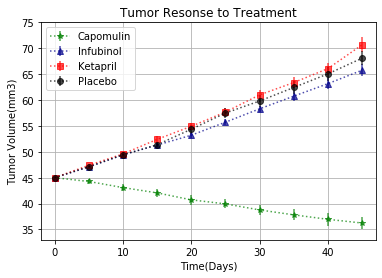

Capomulin has the greatest response to treatment due to the fact that the tumor volume shrinked over time. All other treatments had no affect on the increase of tumor volume.


In [33]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ["green", "darkblue","red","black"]
markers = ["*","^","s","o"]

dfmeans_sem = dfsem.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

for i in drugs:
    yerror = dfmeans_sem[i]
    index = drugs.index(i)
    plt.errorbar(timelist, dfmeans[i],yerr=yerror, marker=markers[index], color=colors[index], linestyle=":", alpha=.70)

plt.legend(labels=drugs, loc="best")  
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Time(Days)")
plt.title("Tumor Resonse to Treatment")
plt.xlim(-2,47)
plt.ylim(33,75)
plt.grid()
plt.show()

print("Capomulin has the greatest response to treatment due to the fact that the tumor volume shrinked over time. All other treatments had no affect on the increase of tumor volume.")

In [15]:
metadfavg = merged[["Drug","Timepoint", "Metastatic Sites"]]
metadfavg = metadfavg.groupby(["Drug","Timepoint"]).mean()
metadfavg.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
metadfsem = merged[["Drug","Timepoint", "Metastatic Sites"]]
metadfsem = metadfsem.groupby(["Drug","Timepoint"]).sem()
metadfsem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [18]:
metadfavg = metadfavg.reset_index()
metamungavg = metadfavg.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
metamungavg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [20]:
metadfsem = metadfsem.reset_index()
metadfmungsem = metadfsem.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
metadfmungsem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


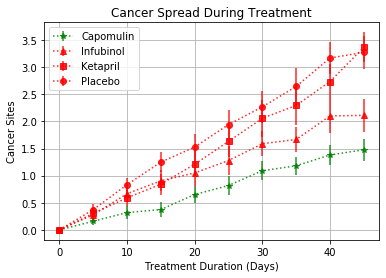

Capomulin has the least amount of spread throughout treatment. Whereas the placebo has the greatest amount of spread, which makes sense as there is no treatment. Next least amount of treatment was the ketapril.


In [30]:
for i in drugs:
    yerror = metadfmungsem[i]
    index=drugs.index(i)
    plt.errorbar(timelist, metamungavg[i],yerr=yerror, marker=markers[index], color=colors[index], linestyle=":", alpha=.85)
    plt.legend(labels=drugs, loc="best")  
    
plt.ylabel("Cancer Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Cancer Spread During Treatment")
plt.grid()
plt.show()

print("Capomulin has the least amount of spread throughout treatment. Whereas the placebo has the greatest amount of spread, which makes sense as there is no treatment. Next least amount of treatment was the ketapril.")

In [22]:
mouse_survival = pd.pivot_table(merged, values="Tumor Volume (mm3)", columns=["Drug"], index=["Timepoint"], aggfunc='count')
mouse_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


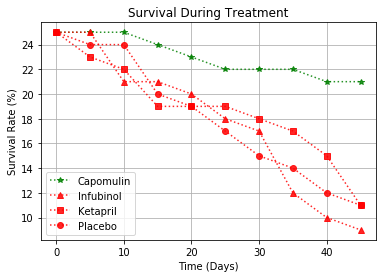

Capulin had the highest survival rate out of the various treatments. Whereas the placebo and the Infubinol had the lowest survival rate.


In [32]:
for i in drugs:
    yerror = mouse_survival[i]
    index=drugs.index(i)
    plt.plot(timelist, mouse_survival[i], marker=markers[index], color=colors[index], linestyle=":", alpha=.85)
    plt.legend(labels=drugs, loc="best")  
    
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.grid()
plt.show()

print("Capulin had the highest survival rate out of the various treatments. Whereas the placebo and the Infubinol had the lowest survival rate.")

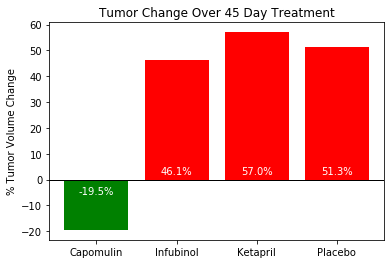

Capomulin had the greatest change in tumor volume percentage over the 45 day treatment.


In [34]:
dfmeansC = dfmeans[drugs]
#empty list to hold appended values from calculation
y = []

#loop through the dataframe for each drug and find the percent change of the first and last value
for i in dfmeansC:
    y.append((dfmeansC[i].iloc[-1] - dfmeansC[i].iloc[0]) / dfmeansC[i].iloc[0] *100)

#set variable for x locations
x = np.arange(len(y))
#list comprehension to determine if bar is green or red
colors = ["green" if item < 0 else "red" for item in y]

#chart attributes
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.bar(x, y, color=colors)
plt.axhline(linewidth=1, color='black', y=0)
plt.xticks(x, drugs)

#loop through values in the y list to determine where label is placed
count = 0
for x in y:
    if x < 0:
        ybar = -5.5
    else:
        ybar = 2
    index=y.index(x)
    plt.text(count, ybar, str(round(y[index],1)) + "%", ha='center', color='white')
    count += 1
    

plt.show()
print("Capomulin had the greatest change in tumor volume percentage over the 45 day treatment.")